이론설명: https://100shye.wixsite.com/website/post/cross-entropy
예측값 Y은 0~1 사이값으로 생성하고
실측값은 0혹은 1의 값을 갖을 것임

1. random 숫자 100개를 2줄 만듬
2. x 데이터 50행은 각 값에서 -2 해주고 그다음 50행은 +2 해줌

In [1]:
import numpy as np
N = 100
D = 2
x = np.random.randn(N, D) # 랜덤숫자 2열 100행
x[:50, :] = x[:50, :] - 2*np.ones((50, D))  # 2를 각 값에서 뺌
x[50:, :] = x[50:, :] + 2*np.ones((50, D))  # 2를 각 값에서 더함

3. T 는 실제 값 target [0,0,0,0... 1, 1, 1, 1,..] 
4. Y 는 예측값
-> entropy가 작으면 예측률이 높아진다.

In [22]:
T = np.array([0]*50 +[1]*50) # 50을 하면 0이 50개 생기네
ones = np.array([[1]*N]).T   # .T를 하면 [[1], [1], [1]..] 됨
Xb = np.concatenate((ones, x), axis = 1) 

#w = np.random.randn(D + 1)  w를 random으로 줬더니 entropy가 작을떄도, 클때도 있음
w = np.array([0, 4,4])    # w를 특정값으로 고정했더니 entropy 매우 작음
z = Xb.dot(w)
def sigmoid(z):
    return(1/(1 + np.exp(-z)))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = (-T*np.log(Y) - (1-T)*np.log(1-Y)).sum() 
    return(E)
cross_entropy(T,Y )

0.0630948307081668

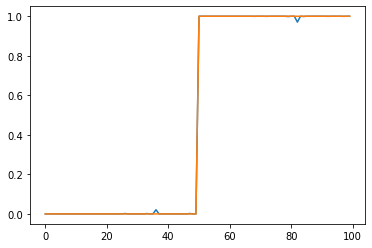

In [23]:
import matplotlib.pyplot as plt
plt.plot(Y)
plt.plot(T)

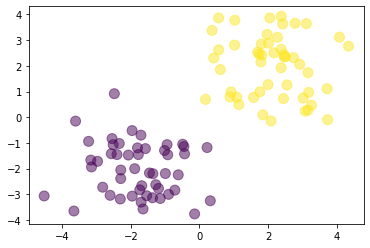

In [21]:
plt.scatter(x[:, 0], x[:, 1], c= T, s= 100, alpha = 0.5)